## MNIST KNN Find Center

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df = pd.read_csv('./data/Result-tsne-35-4000-scale-all.csv')
df.head()

,Unnamed: 0,x1,x2,y
0,0,-14.522441,17.201866,5
1,1,22.770359,40.287700,0
2,2,-51.135750,-15.168975,4
3,3,17.130530,-15.139389,1
4,4,-21.693708,-13.273853,9


### 使用t-SNE做降維，sklearn t-SNE中較重要的參數:

In [103]:
tsneData=df.iloc[:,1:4].values

array([-14.522441,  22.770359, -51.13575 , ..., -37.8957  , -30.946224,
        -6.058468])

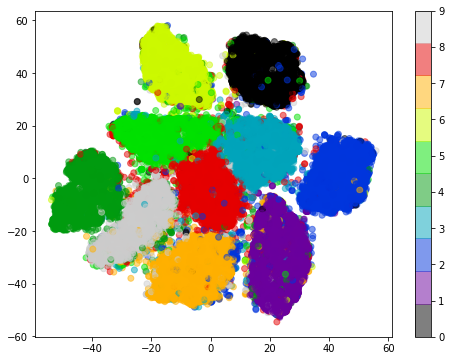

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(tsneData[:, 0], tsneData[:, 1], c=tsneData[:, 2], alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

## Find center

In [105]:
pdData = pd.DataFrame(tsneData, columns = ["x1", "x2","y"])

In [107]:
arr=[]
for i in range(10):
    arr.append(pdData.loc[pdData['y'] == i].values)
arr=np.array(arr)

In [108]:
# for i in range(10):
#     x1=0,x2=0
#     for j in range(len(arr[i])):
#         x1+=arr[i][j][0]
#         x2+=arr[i][j][1]
allCenter=[]
for i in range(10):
    mean=np.mean(arr[i][:,0:2], axis=0)
    allCenter.append(mean)
allCenter=np.array(allCenter) 

In [109]:
allCenter

array([[ 17.89351408,  40.3974383 ],
       [ 22.34058947, -29.7401498 ],
       [ 40.84367465,  -0.17747073],
       [ 15.63485097,  10.01957641],
       [-40.03946422,  -6.24115686],
       [-15.07509393,  15.77437033],
       [-11.89785358,  40.31856031],
       [ -5.35167924, -34.25424154],
       [ -0.28426326,  -4.06609265],
       [-23.64774371, -17.08729935]])

## XGBClassifier

In [117]:
train_x=pdData.iloc[:,0:2].values
train_y=pdData.iloc[:,2:3].values

In [119]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(train_x, train_y)

/Users/yilin/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yilin/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [135]:
y_pred = model.predict([-1.7451286,  7.1458106])
print(y_pred[0])

8.0
